<a href="https://colab.research.google.com/github/VirajDilshanKumarage/AI-and-Machine-Learning/blob/Multiple-linear-regression/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Linear Regression

task:predict petrol consumption of a country given various factors such as tax, distance of highways and population with driving license

input: Tax,distance of highways, average income and population with driving license

output expected petrol consumption



In [31]:
import pandas as pd
import numpy as np
d = {'tax' : pd.Series([9.00,9.00,9.00,9.00,8.00,10.00,8.00,8.00,8.00,7.00,8.00,
                        8.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,8.00,9.00,
                        9.00,9.00,9.00,8.00,8.00,8.00,9.00,7.00,7.00,8.00,8.00,8.00,
                        8.00,5.00,5.00,5.00,7.00,7.00,7.00,7.00,7.00,6.00,9.00,7.00,7.00]),
      'income' : pd.Series([3571,4092,3865,4870,4399,5342,5319,5126,4447,4512,4391,5126,4817,
                         4207,4332,4318,4206,3718,4716,4341,4593,4983,4897,4258,4574,3721,
                         3448,3846,4188,3601,3640,3333,3063,3357,3528,3802,4045,3897,3635,
                         4345,4449,3656,4300,3745,5215,4476,4296,5002]),
      'Highways':pd.Series([1976,1250,1586,2351,431,1333,11868,2138,8577,8507,5939,14186,6930,6580,
                    8159,10340,8508,4725,5915,6010,7834,602,2449,4686,2619,4746,5399,9061,5975
                    ,4650,6905,6594,6524,4121,3495,7834,17782,6385,3274,3905,4639,3985,3635,
                    2611,2302,3942,4083,9794]),
     'driver':pd.Series([0.5250,0.5720,0.5800,0.5290,0.5440,0.5710,0.4510,0.5530,0.5290,0.5520,
                   0.5300,0.5250,0.5740,0.5450,0.6080,0.5860,0.5720,0.5400,0.7240,0.6770,
                   0.6630,0.6020,0.5110,0.5170,0.5510,0.5440,0.5480,0.5790,0.5630,0.4930,
                   0.5180,0.5130,0.5780,0.5470,0.4870,0.6290,0.5660,0.5860,0.6630,0.6720,
                   0.6260,0.5630,0.6030,0.5080,0.6720,0.5710,0.6230,0.5930]),
    'Consumption':pd.Series([541,524,561,414,410,457,344,467,464,498,580,471,525,508,566,635,603,714,
                  865,640,649,540,464,547,460,566,577,631,574,534,571,554,577,628,487,644,
                  640,704,648,968,587,699,632,591,782,510,610,524])}
df = pd.DataFrame(d)
df.head()

,tax,income,Highways,driver,Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,9.0,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
df.shape

(48, 5)

In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.62,1.10,5.00,7.00,8.00,8.00,10.00
income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
driver,48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


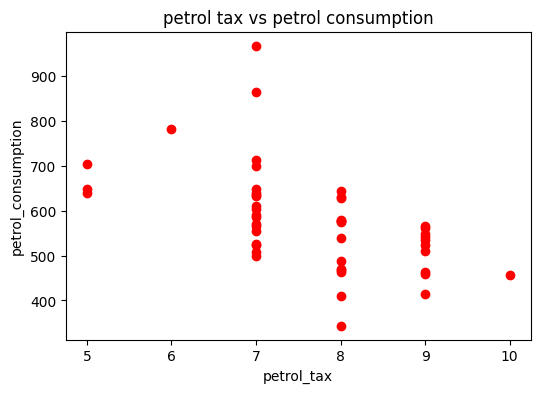

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df['tax'],df['Consumption'],'ro')
plt.title('petrol tax vs petrol consumption')
plt.xlabel('petrol_tax')
plt.ylabel('petrol_consumption')

plt.show()

identify outliers

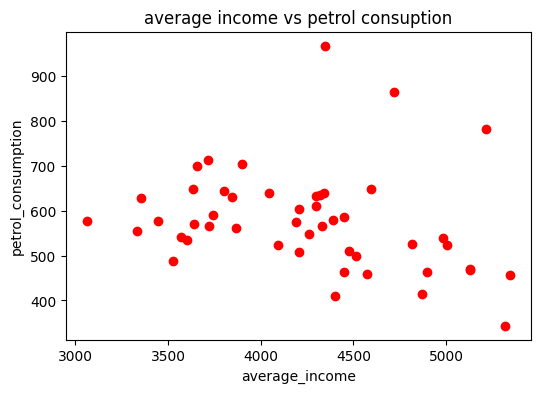

In [17]:
plt.figure(figsize=(6,4))
plt.plot(df['income'],df['Consumption'],'ro')
plt.title('average income vs petrol consuption')
plt.xlabel('average_income')
plt.ylabel('petrol_consumption')
plt.show()

train the model

In [21]:
from re import X
y=df['Consumption']
X= df[['income','income','driver','tax']]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.intercept_

309.1018452753208

In [24]:
regressor.coef_

array([-2.16058877e-02, -2.16058884e-02,  1.08226095e+03, -2.14376271e+01])

make prediction

In [25]:
y_pred = regressor.predict(X_test)

In [28]:
results = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})

In [29]:
print(results)

    Actual   Predicted
27     631  598.037429
40     587  644.284620
26     577  581.685627
43     591  546.998918
24     460  514.838323
37     704  667.722337
12     525  572.105117
19     640  704.146801
4      410  536.262184
25     566  544.122141
8      464  517.954104
3      414  478.237896
6      344  395.857081
39     968  698.562649
33     628  584.535637
13     508  567.078733


evaluating the model

In [32]:
from sklearn .metrics import mean_absolute_error,mean_squared_error
MAE= mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

print(f'mean absolute error : {MAE: .2f}')
print(f'mean squared error: {MSE: .2F}')
print(f'root mean squared error: {RMSE: .2f}')

mean absolute error :  64.47
mean squared error:  7569.16
root mean squared error:  87.00


In [33]:
from matplotlib.backend_bases import register_backend
regressor.score(X_test,y_test)
regressor.score(X_train,y_train)

0.6316790405378465

possible improvements:
* increase size of the data
* try non-linear relation
* may requre more features